# Lab 1: Building a Neural Network
In the first lecture, you were introduced to the basics of neural networks.  In today's lab, you will create a simple neural network build some intuition about how it works.  The basic ideas will be demonstrated with code snippets and exercises.  You will explore the affect of different activation functions, the importance of the neuron weights and biases, and the affect of multiple interacting neurons.

First, we import some basic `python` libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The Perceptron

We begin with a single neuron, which we called the *perceptron*.

![perceptron](figs/perceptron.png)

There are some inputs $x$, which get combined into an auxilliary variable $z$.  The auxilliary variable is passed through the activation function $\sigma\left(z\right)$ and the result is the output.

Here is another image showing each step.

![](figs/expanded-perceptron.png)

Notice that the inputs are linearly combined according to some weights $w$ and a bias $b$.  This transformation is also sometimes called and *affine* transformation.  The perceptron transforms the weighted inputs according to the rule of the activation function.  For a single perceptron, the output $y$ is just the output from the perceptron.  The linear transformation and activation of the neuron occur within a single *layer* of the network (shown in the dotted box).

### Example
The task is to approximate (or learn) a function $f\left(x\right)$ given some input $x$.  For demonstration purposes, the function we will try to learn is a Gaussian function $$f\left(x\right) = \exp\left(-x^{2}\right).$$  Even though we represent the input $x$ as a vector on the computer, you should think of it as a single input.  For example, we're not passing $x$ and $y$ into the network.

In [2]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # The real function

Let's see what the single-layer, single neuron network give us.  We have a couple of choices to make:
1. We must choose some weights and some biases
2. We must choose an activation function

For now, we will manually specify the weights and biases.

We choose a *sigmoid* activation function $$\sigma\left(x\right) = \dfrac{1}{1 + e^{-z}}.$$  What are the limits $\displaystyle\lim_{z\to\infty}\sigma\left(z\right)$ and $\displaystyle\lim_{z\to-\infty}\sigma\left(z\right)$?

There are other activation functions.  For example:
* Rectified linear unit:  $$\sigma\left(z\right) = \text{max}\left(0, z\right)$$
* Hyperbolic tangent:  $$\sigma\left(z\right) = \tanh\left(z\right)$$

In fact, choosing the correct activation function is a really big deal.  Notice that the activation functions we've mentioned so far have the feature that they "turn on" at some point and "saturate" at some point.

Okay, enough talk.  Let's code up the sigmoid.

In [3]:
# Manually specify the weight and bias
w = -4.5 # weight
b = 3.0 # bias

# Perceptron output
z = w * x + b # Linear transformation
h = 1.0 / (1.0 + np.exp(-z)) # Sigmoid activation

And now we plot the activation function and the true function.

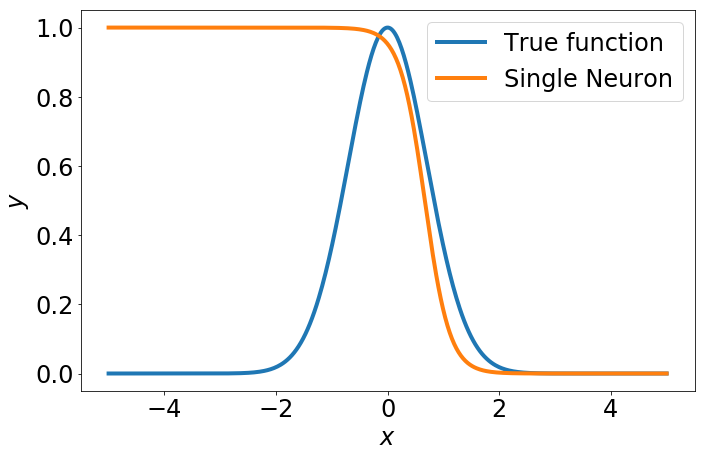

In [4]:
fig, ax = plt.subplots(1,1, figsize=(11,7)) # create axes object

# Plot
ax.plot(x, f, lw=4, label=r'True function')
ax.plot(x, h, lw=4, label=r'Single Neuron')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

The prediction looks awful.  But we expected that.  The single perceptron simple turns the output on and off at some point, but that's about it.  We see that the neuron is on until about $x=0$ at which point it abruptly turns off.  It's able to get "close" to the true function just by luck.  Otherwise, it has nothing in common with the true function.

What do you think will happen if you change $w$ and $b$?

### Exercise

#### Part 1
Write two `Python` functions:
1. The first function should return an affine transformation of the data for a single perceptron.  Here's the required interface:
```python
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: A float representing the weight of the perceptron
    b: A float representing the bias of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
       z = wx + b
    """
    
    # Code goes here
    return z
```
2. The second function should return the sigmoid activation function.  Here's the required interface:
```python
def sigmoid(z):
    # Code goes here
    return h
```

#### Part 2
* Using your two functions, recreate the example from class
* Try to change the weight and bias to get a better fit

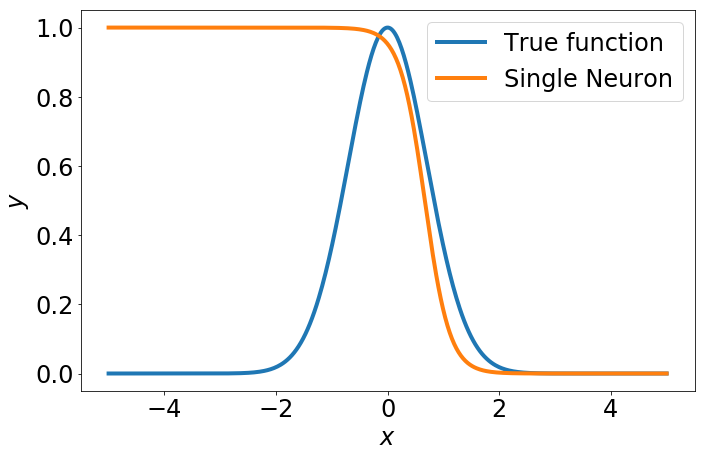

In [5]:
def affine(x, w, b):
    return w * x + b

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = -4.5
b = 3.0

h = sigmoid(affine(x, w, b))

# Plot
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.plot(x, f, lw=4, label=r'True function')
ax.plot(x, h, lw=4, label=r'Single Neuron')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

Great!

#### Important Observation
Notice that we wrote the output as `sigmoid(affine(x))`.  This was not a coincidence.  It looks like a composition of functions.  In fact, that is what a neural network is doing.  It's building up an approximation to a function by creating a composition of functions.  For example, a composition of three functions would be written as $$\varphi_{3}\left(\varphi_{2}\left(\varphi_{1}\left(x\right)\right)\right).$$

What happens if we play with the weights and biases?

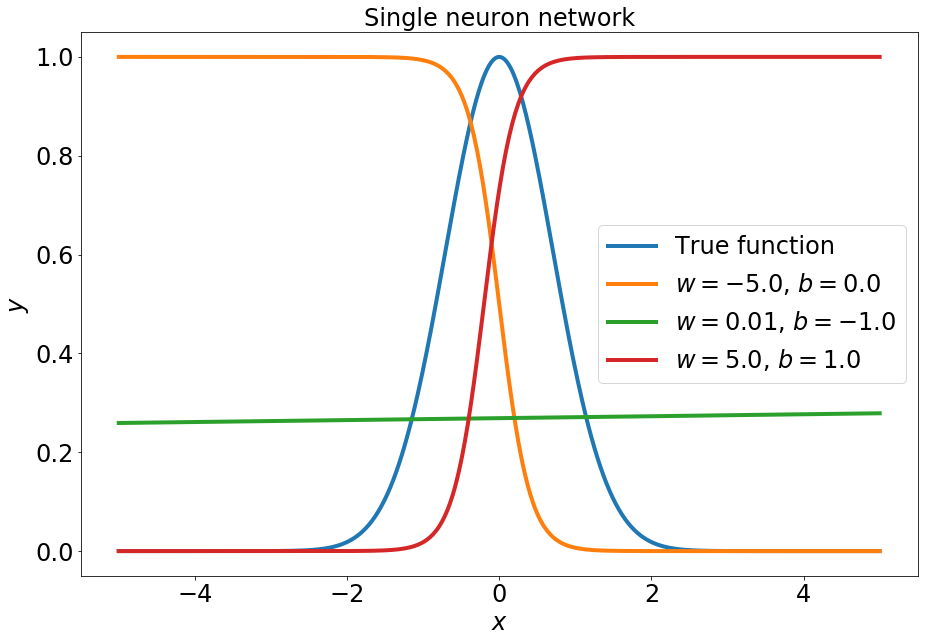

In [6]:
w = [-5.0, 0.01, 5.0] # Create a list of weights
b = [0.0, -1.0, 1.0] # Create a list of biases

fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(x, f, lw=4, label='True function')
for wi, bi in zip(w, b):
    h = sigmoid(affine(x, wi, bi))
    ax.plot(x, h, lw=4, label=r'$w = {{{0}}}$, $b = {{{1}}}$'.format(wi,bi))

ax.set_title('Single neuron network', fontsize=24)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc='best') # Create a legend and make it big enough to read

We didn't do an exhaustive search of the weights and biases, but it sure looks like this single perceptron is never going to match the actual function.  Again, we shouldn't be suprised about this.  The output layer of the network is simple the logistic function, which can only have so much flexibility.

Not all hope is lost!  We may be able to make our network more flexible by using more nodes.

## Multiple Perceptrons in a Single Layer
It appears that a single neuron is somewhat limited in what it can accomplish.  What if we expand the number of neurons in our network?  We have two obvious choices here.  One option is to add depth to the network by putting neurons next to each other.  We won't take that path yet.  The other option is to stack neurons on top of each other.  Now the network has some width, but is still only one layer deep.

The following figure shows a single-layer network with two nodes in one layer.

![](figs/multiple-perceptrons.png)

#### Some observations
1. We still have a single input in this case.  Note that this is not necessary in general.  We're just keeping things simple with a single input for now.
2. Each node (or neuron) has a weight and bias associated with it.  An affine transformation is performed for each node.
3. Both nodes use the same activation function form $\sigma\left(\cdot\right)$ on their respective inputs.
4. The outputs of the nodes must be combined to give the overall output of the network.  There are a variety of ways of accomplishing this.  In the current example, we just take a linear combination of the node outputs to produce the actual prediction.  Notice that now we have weights and biases at the output too.

Let's see what happens in this case.  First, we just compute the outputs of each neuron.

In [22]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = np.array([1.5, -2.5])
b = np.array([0.4, -2.0])

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))

Now let's plot things and see what they look like.

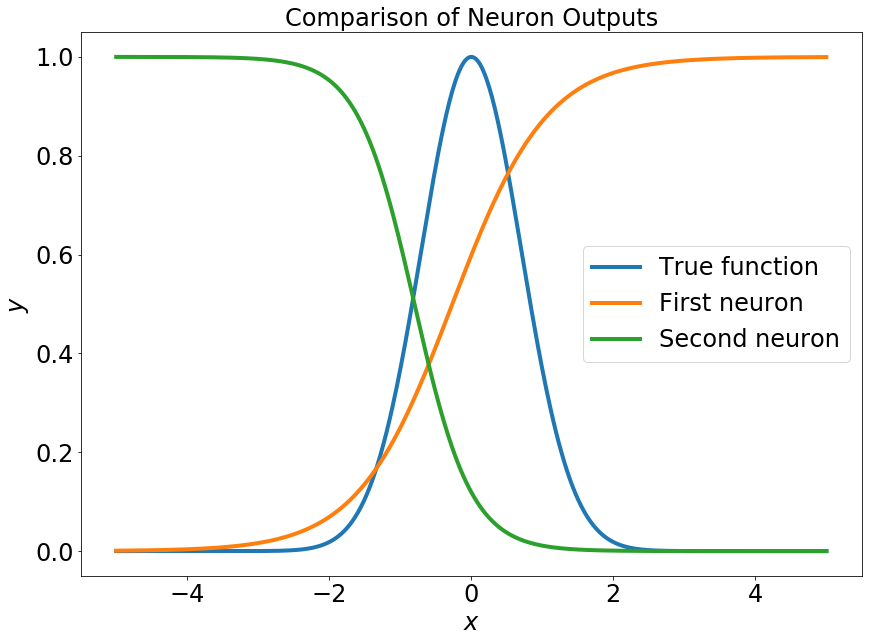

In [26]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, label='True function')
ax.plot(x, h1, lw=4, label='First neuron')
ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=24)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc='best') # Create a legend and make it big enough to read

Just as we expected.  Some sigmoids.  Of course, to get the network prediction we must combine these two sigmoid curves somehow.  Firs we'll just add $h_{1}$ and $h_{2}$ without any weights to see what happens.

In [50]:
# Network output
wout = np.ones(2) # Set the output weights to unity to begin
bout = 0.0 # No bias yet
yout = wout[0] * h1 + wout[1] * h2 + bout

And plot.

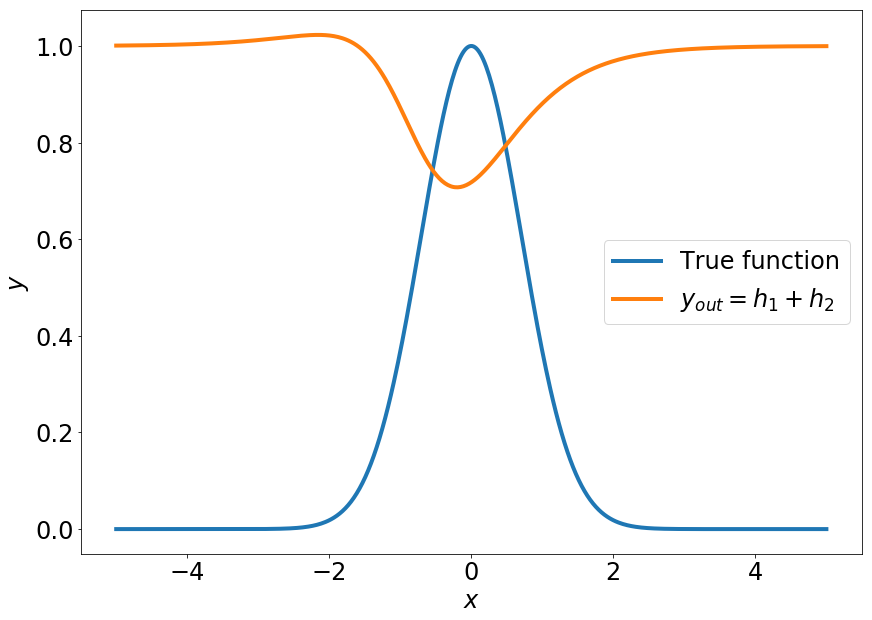

In [51]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, label=r'True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = h_{1} + h_{2}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc='best') # Create a legend and make it big enough to read

#### Observations
* The network prediction is still really bad.
* *But*, it is pretty sophisticated.  We just have two neurons, but we get some pretty interesting behavior.
* We should be cautiously optimistic.

We didn't do anything with the output weights.  Those are probably important.  Now let's see what happens when we change the weights on the output.

In [83]:
# Network output
wout = np.array([-1.5, -1.5])
bout = np.array(1.5)

yout = wout[0] * h1 + wout[1] * h2 + bout

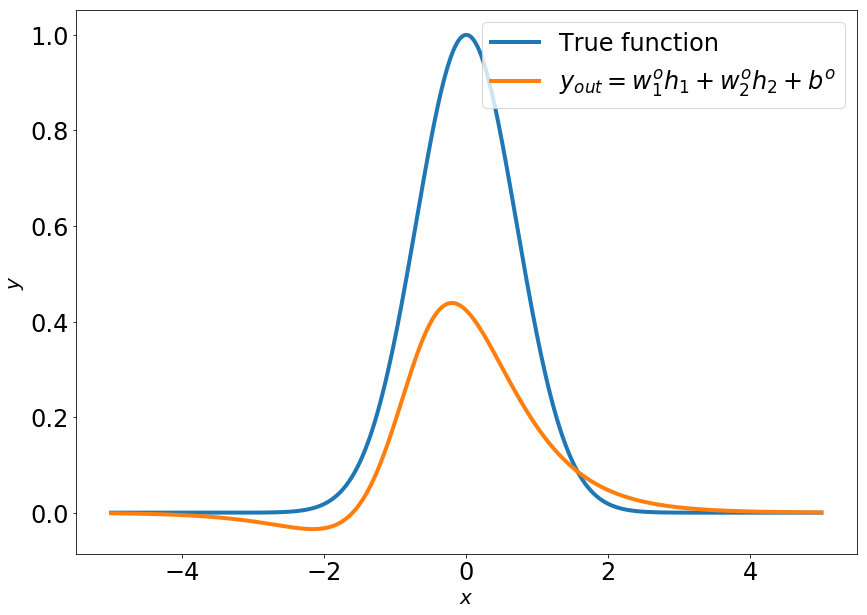

In [93]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, label='True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = w_{1}^{o}h_{1} + w_{2}^{o}h_{2} + b^{o}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

Very cool!  The two nodes interact with each other to produce a pretty complicated-looking function.  It still doesn't match the true function, but now we have some hope.  In fact, it's starting to look a little bit like a Gaussian!

I bet we can do better.  There are three obvious options at this point:
1. Change the number of nodes
2. Change the activation functions
3. Change the weights

### Some Mathematical Notation
Before proceeding, let's learn a more succint way of doing the calculations.  If you have a network with a lot of nodes, then you probably don't want to manually determine the output of each node.  It will take forever.  Instead, you can package the computations up using a more compact notation.  We'll illustrate the ideas with the two-node network.

Suppose we have a single input $x$ to a single-layer two-node network.  We can store the weights from each node in a vector $\mathbf{w} \in \mathbb{R}^{2}$.  Similarly, we can store the biases from each node in a vector $\mathbf{b} \in \mathbb{R}^{2}$.  The affine transformation is then written as $$\mathbf{z} = \mathbf{w}x + \mathbf{b}$$ where the usual laws of vector addition and multiplication by a scalar apply.  Of course, we have that $\mathbf{z} \in \mathbb{R}^{2}$ as well.  Next we evaluate the output from each node.  Formally, we write $$\mathbf{h} = \sigma\left(\mathbf{z}\right)$$ where, once again, $\mathbf{h}\in\mathbb{R}^{2}$.  Moreover, it is *understood* that $\sigma$ operates on each individual element of $\mathbf{z}$ separately.  If we denote each component of $\mathbf{z}$ by $z_{j}, \quad j = 1, 2$ then we can write $$h_{j} = \sigma\left(z_{j}\right), \quad j = 1, 2.$$

Lastly, we must do something about the output layer.  Mathematically we write $$y_{out} = \mathbf{w}_{out} \cdot \mathbf{h} + b_{out}$$ where $\mathbf{w}_{out} \in \mathbb{R}^{2}$ and $b_{out} \in \mathbb{R}$.

### Comments on the Implementation
Mathematically, this all makes perfect sense.  There is a slight wrinkle when we get to the implementation.  The reason is that $x$ must be stored as a vector (or array) on the computer!  When we do that, we must be very careful in telling the computer how to perform the multiplications.

#### Example A
Suppose we have just stored three points in $x$ on the computer and store $x$ in an array.  Then we have 
\begin{align}
  x = \begin{bmatrix} x_{1} \ x_{2} \ x_{3} \end{bmatrix}.
\end{align}
When we write $\mathbf{w}x + \mathbf{b}$ the computer actually doesn't know what multiplication we want to do.  If we treat $x$ as though it has dimension $3 \times 1$ then simply multiplying $\mathbf{w}$ by $x$ will result in a dimension mismatch error.

#### Example B
What if we're at the output of the network?  Then $\mathbf{h}$ is stored as a $2 \times \text{num_points}$ array.  But $\mathbf{w}_{out}$ is a $2\times 1$ array!  To get the dot product right, we need to tell the computer to take the dot product on each column.  Here's the situation:
\begin{align}
  \mathbf{w}_{out} \cdot \mathbf{h} &= 
  \begin{bmatrix}
    w_{1}^{out} \ \ w_{2}^{out}
  \end{bmatrix}^{T}
  \begin{bmatrix}
    h_{11} & h_{12} & h_{13} \\
    h_{21} & h_{22} & h_{23}
  \end{bmatrix}
  \\
  &=
  \begin{bmatrix}
    w_{1}^{out}h_{11} + w_{2}^{out}h_{21} \qquad w_{1}^{out}h_{12} + w_{2}^{out}h_{22} \qquad w_{1}^{out}h_{13} + w_{2}^{out}h_{23}
  \end{bmatrix}
\end{align}

To overcome these problems, we can use the `numpy` [`tensordot`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.tensordot.html) function.  That function allows us to directly specify how to perform the multiplication.  I would encourage you all to play around with `tensordot` to get used to the syntax.

The next example shows how to re-write our single-layer network using this succinct notation.

### Example
Write a function that can handle the above situations.

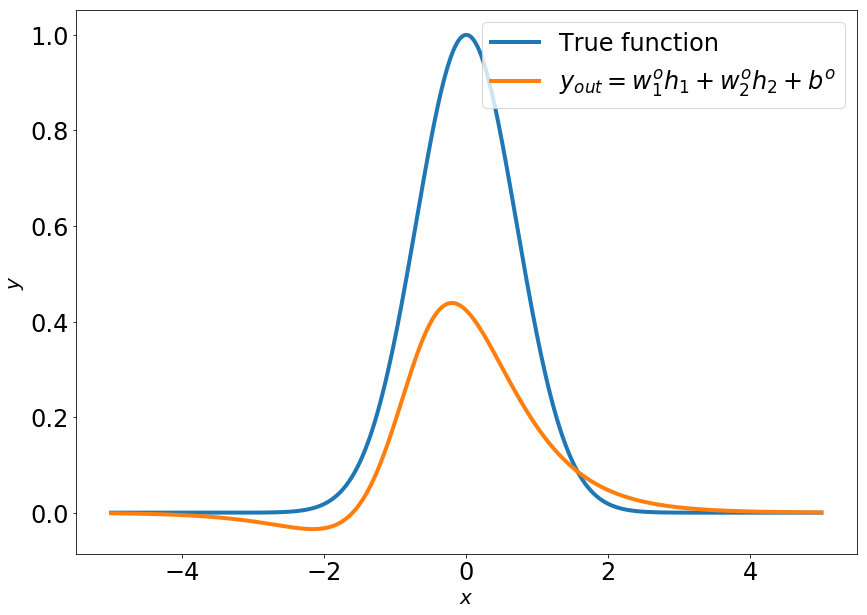

In [96]:
def nodes(x, w, b):
    z = np.tensordot(w, x, axes=0) + b.reshape((len(w),-1))
    return 1.0 / (1.0 + np.exp(-z))

def output(h, wout, bout):
    return np.tensordot(wout, h, axes=1) + bout

h = nodes(x, w, b)
yout = output(h, wout, bout)


fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, label='True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = w_{1}^{o}h_{1} + w_{2}^{o}h_{2} + b^{o}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

We got the same result.  Good.  We're ready to try some more interesting things now.

## Changing Number of Nodes

Now compare solution with different number of nodes.

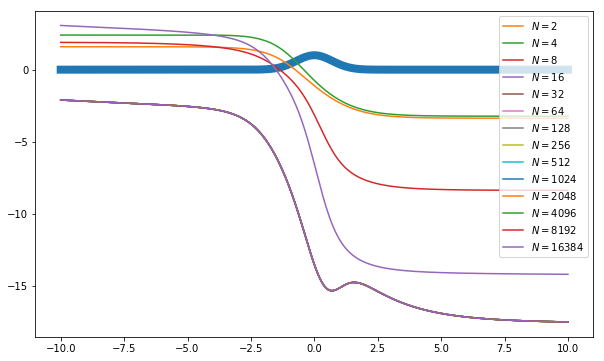

In [14]:
num_nodes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

ws = np.random.uniform(-3.0, 3.0, 32)
bs = np.random.uniform(-3.0, 3.0, 32)

wouts = np.random.uniform(-3.0, 3.0, 32)
bout = np.random.uniform(-3.0, 3.0, 1)

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x, y, lw=8)

for N in num_nodes:
    w = ws[:N]
    b = bs[:N]
    
    wout = wouts[:N]
    
    h = nodes(x, w, b)
    yout = output(h, wout, bout)

    ax.plot(x, yout, label=r'$N = {{{0}}}$'.format(N))

ax.legend()

That's a little disappointing.  We're getting more complex behavior in our predictions, but they're still barely matching the true function.  It could be our activation function choice (sigmoid).  Or (more likely) it's the weights that we are using.  Right now, we're just grabbing random weights.  Let's do a grid-search over the weights and biases and assess the affects.

## Changing Weights
To keep things simple, let's go back to the single layer, two-node network.

In [15]:
num_nodes = 2

w = np.random.uniform(-3.0, 3.0, num_nodes)
b = np.random.uniform(-3.0, 3.0, num_nodes)

wout = np.random.uniform(-3.0, 3.0, num_nodes)
bout = np.random.uniform(-3.0, 3.0, 1)

h = nodes(x, w, b)
yout = output(h, wout, bout)

In [16]:
# Maybe create weights and biases in a meshgrid
# Will tensordot still work nicely for this case?
# If so, then we get h at all the w and b values for each x
# Then same kind of thing for wout
# Then we're done
# But the problem is that we have a kind of weird tensor now.

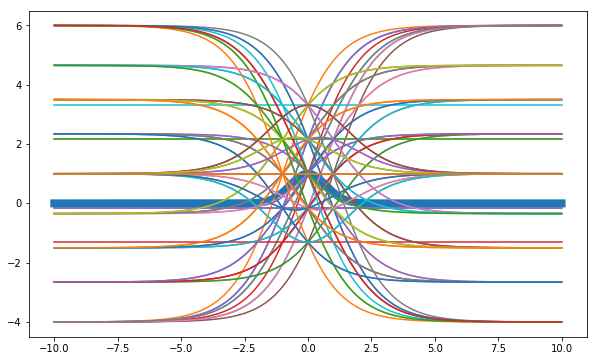

In [17]:
nw = 3
L = 1.0
w_one = np.linspace(-L, L, nw)
w_two = np.linspace(-L, L, nw)
b_one = np.linspace(-L, L, nw)
b_two = np.linspace(-L, L, nw)

wout = np.array([-5.0, 5.0])
bout = 1.0

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x, y, lw=8)
for w1 in w_one:
    for w2 in w_two:
        w = np.array([w1, w2])
        for b1 in b_one:
            for b2 in b_two:
                b = np.array([b1, b2])
                h = nodes(x, w, b)
                yout = output(h, wout, bout)
                
                ax.plot(x, yout)

## Putting in More Layers

## Keras and other Software
Just a teaser.